# Constant Prior Heat Coefficient Fitting

## Model Problem

$$\begin{split}
\frac{\partial u}{\partial t} = \frac{\partial}{\partial x} \left(\kappa(x) \frac{\partial u}{\partial x} 
\right) & \quad x \in (0, 1) \quad 0 < t < T \\
u(0, t) = u(1, t) = 0 & \quad 0 \leq t \leq T \\
u(x, 0) = u_0(x) & \quad x \in (0, 1) 
\end{split}$$

The exact solution $\hat u(x, t)$ is a result of the true diffusivity $\hat \kappa(x)$.
We have access to measured values 

$$
u(x_j, t) = \hat u(x_j, T) + \eta_j, \quad \eta_j \sim \mathcal N(0, \gamma^2), \quad j = 1,..., N
$$

Where $\eta_j$ are the observation noise.  

Let $\mathcal G : W^{1, 2}(0, 1) \to \mathbb R^N$ be such that 
$\kappa \mapsto \mathcal G(\kappa) = \mathbf u$ where $u_j = u(x_j, T)$ are the solution to the 
model PDE at the measurement locations and times.  In this way
$\hat{\mathbf u} = \mathcal G(\hat \kappa)$.

We assume $\log \kappa = X$ such that $\log \hat \kappa = \mathbb E\left[X\right]$, where
$X \sim \mathcal N(\mu, \mathcal C)$.  This allows us to use the Bayesian Prior/Posterior
approach.

Let the prior be governed by probability measure $\mu_0$, and be defined by 

$$
\mu_0 = \mathcal N(m_0, \mathcal C_0)
$$

If $\lambda$ is the Lebesgue meaure, then the PDF of $\mu_0$, $\pi_0$ is given by

$$
\pi_0(X) = \frac{d\mu_0}{d\lambda} \quad \mu_0(\Omega) = \int_\Omega \pi_0(X) \, d\lambda (\Omega)
$$

Here $(\Omega, \mathcal F, \mu_0)$ is the probability space containing $X$.
$\Omega = \{f : \left[0, 1\right] \to \mathbb R : \exp(f(x)) \in W^{1, 2}(0, 1)\}$.

The Lebesgue measure of this set is hard to define, instead we can use the Karhunen-Lo\'eve series 
expansion.  If 

$$
\mathcal C_0 \phi_k = \lambda_k \phi_k
$$

Then 

$$
X = \mu_0(x) + \sum_{k=1}^\infty \xi_k \phi_k(x) \sim \mathcal N(\mu_0, \mathcal C_0)
$$

Where $\xi_k \sim \mathcal N(0, \lambda_k)$.

Thus providing a mapping from $\ell^2(\mathbb R) \to \mathcal N(\mu_0, \mathcal C_0)$

If we instead truncate this series to $N$ terms, then we can write the following

$$
X \approx \mu_0(x) + \sum_{k=1}^N \xi_k \phi_k(x)
$$

Where $\mathbf \xi \sim \mathcal N(0, \Lambda)$

If $\nu$ is the probability measure on $\mathcal N(0, \Lambda)$, then we can construct the PDF 

$$
\pi^{(\nu)}(\mathbf \xi) = 
\frac{1}{(2\pi)^{N / 2}} \frac{1}{\prod_{j=1}^N \sqrt{\lambda_j}} \exp \left\{
-\frac{1}{2} \sum_{j=1}^N \frac{\xi_j^2}{\lambda_j}\right\} 
$$

## A Bayesian Framework for the Inverse Problem

Applying the prior and Bayes Formula, we have the following results 

$$
\mathbb P^{\mathbf u} (X = \chi) = 
\sum_{\mathcal G(e^X)} \mathbb P(X = \chi \mid \mathcal G(e^X) = \mathbf u) 
\mathbb P(\mathcal G(e^X) = \mathbf u)
$$

It is known 

$$
\mathbb P(X = \chi \mid \mathcal G(e^X) = \mathbf u) \mathbb P(\mathcal G(e^X) = \mathbf u) = 
\mathbb P(\mathcal G(e^X) = \mathbf u \mid X = \chi) \mathbb P_0(X = \chi)
$$

Giving 

$$
\mathbb P(X = \chi \mid \mathcal G(e^X) = \mathbf u) = 
\frac{\mathbb P(\mathcal G(e^X) = \mathbf u \mid X = \chi) \mathbb P_0(X = \chi)}
{\mathbb P(\mathcal G(e^X) = \mathbf u)}
$$

Assembling gives 

$$\begin{split}
\mathbb P^{\mathbf u}(X = \chi) & = \sum_{\mathcal G(e^X)}
\frac{\mathbb P(\mathcal G(e^X) = \mathbf u \mid X = \chi) \mathbb P_0(X = \chi)}
{\mathbb P(\mathcal G(e^X) = \mathbf u)} \mathbb P(\mathcal G(e^X) = \mathbf u) \\
& = \sum_{\mathcal G(e^X)} \mathbb P(\mathcal G(e^X) = \mathbf u \mid X = \chi) \mathbb P_0(X = \chi)
\end{split}$$

Here $\mathbb P^{\mathbf u}$ is the posterior distribution, which can be used 
to approximate $\mathcal N(\mu, \mathcal C)$.

## A MCMC Metropolis Algorithm

The formula for the posterior gives rise to an algorithm to compute it.  Given the prior distribution
on $X$, this induces a distribution on $\mathcal G(e^X)$ given by 

$$
\mathbb P(\mathcal G(e^X) = \mathbf u) = \sum_{X \sim \mu_0} 
\mathbb P(\mathcal G(e^X) = \mathbf u \mid X = \chi) \mathbb P_0(X = \chi)
$$

Therefore generating a series of samples $X^{(n)}$ from the prior distribution, 
we can determine whether each sample provides a reasonable sample $\mathcal G(e^{X^{(n)}})$ based on 
the probability $\mathbb P(\mathcal G(e^X) = \mathbf u \mid X = X^{(n)})$

Having generated say $M$ samples of $\mathcal G(e^X)$, then we can compute the posterior
by the above summation.  To do this we will use a Marcov Chain Monte Carlo Metropolis algorithm.
It will proceed as follows

0. Fix $\mu_0, \mathcal C_0$, and an initial sample $\xi^{(0)}$ generating $X^{(0)}$ and a scalar 
$\beta \in (0, 1)$

1. For $n = 1, ..., M$ build a proposal 
$\tilde \xi^{(n + 1)} = \sqrt{1 - \beta^2} (\xi^{(n)} - \xi^{(0)}) + \beta \zeta$
Where $\zeta \sim \mathcal N(0, \Lambda)$

2. Determine whether the proposal is a reasonable one via building the acceptance probability
$p = \min\{1, \rho\}$, where 
$$
\rho = \frac{\mathbb P(\mathcal G(e^X) = \mathbf u \mid X = \tilde X^{(n+1)})}
{\mathbb P(\mathcal G(e^X) = \mathbf u \mid X = X^{(n)})}
$$
Then generate $\alpha$ as a uniform random variable from 0 to 1.  If $\alpha < p$, then 
$\xi^{(n+1)} = \tilde \xi^{(n+1)}$.  Otherwise $\xi^{(n+1)} = \xi^{(n)}$

3. Repeat to step 1.

## Fixing the Forms

Because of the gaussian noise, we have 

$$
\mathbb P(\mathcal G(e^X) = \mathbf u \mid X = \chi) = \mathbb P(\mathbf \eta = 
\mathbf u - \mathcal G(e^\chi))
$$

By Gaussianity, the PDF for $\eta$ is given by 

$$
\pi(\eta) = \frac{1}{(2\pi)^{N / 2} \gamma^N} \exp\left\{
-\frac{\left|\left|\eta\right|\right|^2_2}{2 \gamma^2}\right\} = 
\frac{1}{(2\pi)^{N / 2} \gamma^N} \exp\left\{
-\frac{\left|\left|\mathbf u - \mathcal G(e^\chi)\right|\right|^2_2}{2 \gamma^2}\right\}
$$

However it can be seen that in evaluating $\rho$, the normalization terms will cancel, giving

$$
\rho = \exp\left\{\frac{\left|\left|\mathbf u - \mathcal G\left(e^{X^{(n)}}\right))\right|\right|^2 - 
\left|\left|\mathbf u - \mathcal G\left(e^{\tilde X^{(n+1)}}\right)\right|\right|^2}{2 \gamma^2}\right\}
$$

## Our Experiment

Let $\hat \kappa$ be the true value of $\kappa(x)$.  Let 

$$
\hat \kappa(x) = \exp\left\{e^{-10 (x - 0.7)^2} \right\}
$$

We also choose initial condition $u_0 = 100$

We also choose a simple prior, let $m_0 = 0$, and 

$$
(\mathcal C_0 f)(x) = \int_0^1 c(x, y) f(y) \, dy, \quad 
c(x, y) = \begin{cases} 
-x (1 - y) & 0 \leq x \leq y \leq 1 \\
-y (1 - x) & 0 \leq y < x \leq 1
\end{cases}
$$

Via the KLSE, then the eigenfunctions/values of $\mathcal C_0$ are given by 

$$
\lambda_k = \frac{1}{k^2 \pi^2}, \quad \phi_k(x) = \sqrt{2} \sin(k \pi x), \quad k \in \mathbb N
$$

Lastly, we choose our measurements to be at locations $x_j = 0.1 j$, where $j = 1, ..., 9$.  
With spacing of $\Delta x = 0.1$, this means that for values $k \geq 20$ are unresolved on 
our grid.  Therefore we can truncate the KLSE sum at a maximum $K = 20$.

## The Solution Framework

In [206]:
# imports and setup
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stat
import sys

sys.path.insert(1, "../")
plt.rcParams.update({"font.size": 20})

import ode

$$
X := \log \kappa
$$

In [173]:
X_true = lambda x: -np.exp(- 10 * np.power(x - 0.7, 2))
κ_true = lambda x: np.exp(X_true(x))

# build the true solution
nx_true = 100
x_true = np.linspace(0, 1, nx_true+1)

# chronology
tmax = 1
nt = 3 * nx_true
Δt = tmax / nt

# build the solution
def solve(κ):
    # second order centered difference differentiation matrix
    Dx = ode.diffmat(x_true, der=1, order=2)
    
    # matrix of κ values
    K = np.diagflat(κ)
    
    # Operator matrix
    A = Dx @ K @ Dx
    B = np.eye(len(κ)) + 0.5 * Δt * A
    B[0, :] = 0; B[-1, :] = 0
    C = np.eye(len(κ)) - 0.5 * Δt * A
    C[0, :] = 0; C[0, 0] = 1
    C[-1, :] = 0; C[-1, -1] = 1
    
    # crank-nicolson solution
    uprev = 100 * np.ones(np.shape(κ))
    
    for n in range(nt-1):
        unext = np.linalg.solve(C, B @ uprev)
        uprev = np.copy(unext)
    return unext

# measurement
x_meas = 0.1 * np.arange(1, 10)
indices = np.zeros(len(x_meas))
curr = 0
for i in range(len(x_true)):
    if x_true[i-1] < x_meas[curr] and x_true[i] >= x_meas[curr]:
        indices[curr] = i
        curr += 1
    if curr >= len(indices):
        break
indices = indices.astype(np.int32)
print(indices)
print(x_true[indices])

def G(κ):
    sol = solve(κ)
    res = sol[indices]
    return res

[10 20 31 40 50 61 70 80 90]
[0.1  0.2  0.31 0.4  0.5  0.61 0.7  0.8  0.9 ]


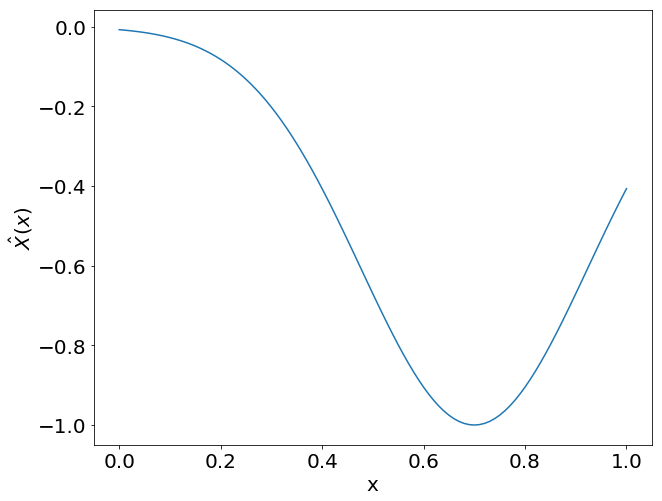

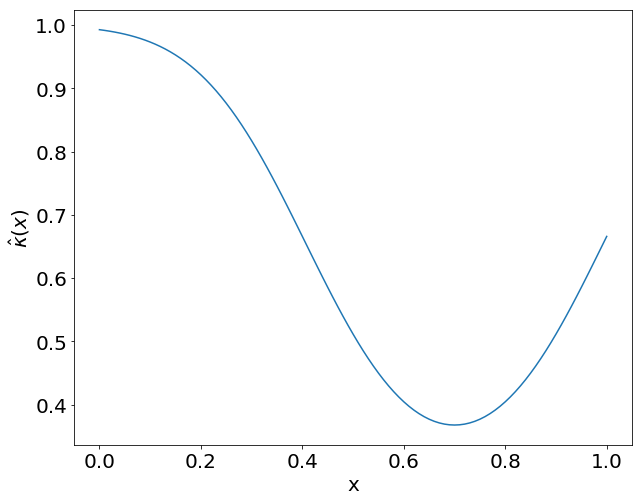

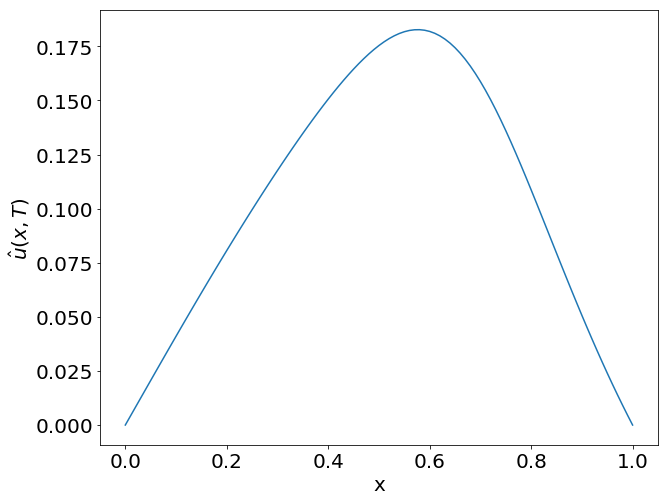

In [213]:
# true solution and plotting
plt.figure(figsize=(10, 8))
plt.plot(x_true, X_true(x_true))
plt.xlabel('x')
plt.ylabel('$\\hat X(x)$')
plt.savefig("X-true.pdf")
plt.show()

plt.figure(figsize=(10, 8))
plt.plot(x_true, κ_true(x_true))
plt.xlabel('x')
plt.ylabel('$\\hat \\kappa(x)$')
plt.savefig("kappa-true.pdf")
plt.show()

plt.figure(figsize=(10, 8))
u_true = solve(κ_true(x_true))
plt.plot(x_true, u_true)
plt.xlabel('x')
plt.ylabel('$\\hat u(x, T)$')
plt.savefig("u-true.pdf")
plt.show()

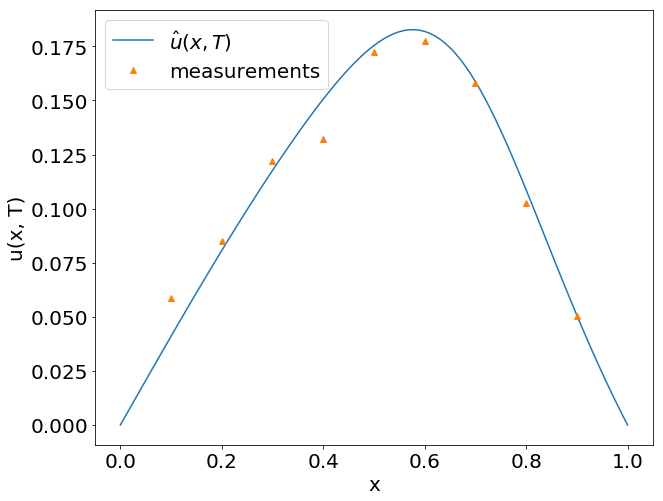

In [216]:
# noisy measurements
γ = 1e-2

np.random.seed(3)
η = np.random.normal(loc=0, scale=γ, size=len(x_meas))
u_meas = G(κ_true(x_true)) + η

plt.figure(figsize=(10, 8))
plt.plot(x_true, u_true, label="$\\hat u(x, T)$")
plt.plot(x_meas, u_meas, "^", label="measurements")
plt.xlabel("x")
plt.ylabel("u(x, T)")
plt.legend()
plt.savefig("u-true-measurements.pdf")
plt.show()

In [187]:
# setup for metropolis, prior

# eigenvalues and eigenvectors
Nmax = 20
λ_vals = 1 / np.power(np.arange(1, Nmax) * np.pi, 2)
ϕ = lambda k, x: np.sqrt(2) * np.sin(k * np.pi * x)
m0 = lambda x: np.zeros(len(x))

To evaluate the probability of acceptance we can define a helper function 

$$
\Phi(X; \mathbf u, \gamma) := - \frac{1}{2\gamma^2} \left|\left|
\mathbf u - \mathcal G\left(e^X\right) \right|\right|
$$

Which reduces the probability of acceptance at each stage of the metropolis step to 

$$
\rho = \exp\left\{\Phi\left(\tilde X^{(n+1)}\right) - \Phi\left(X^{(n)}\right)\right\}
$$

In [188]:
# Φ helper function
Φ = lambda X, u, γ: - 1 / (2 * γ**2) * np.linalg.norm(G(np.exp(X)) - u)

# convert from KLSE of X to X itself
def build_X(ξ):
    Kvals, Xvals = np.meshgrid(np.arange(1, Nmax), x_true)
    ϕ_mat = ϕ(Kvals, Xvals)
    X = m0(x_true) + ϕ_mat @ ξ
    return X

In [202]:
# Metropolis algorithm 
# initialize
ξ0 = np.zeros(Nmax-1)
β = 0.8

M = 100000
Ξ_record = np.zeros((Nmax-1, M+1))

# placeholders for computational ease
X_prev = build_X(ξ0)
Φ_prev = Φ(X_prev, u_meas, γ)

# metropolis loop
np.random.seed(50)
for j in range(M):
    # proposal
    ζ = np.random.normal(loc=0, scale=np.sqrt(λ_vals))
    ξ_proposal = np.sqrt(1 - β**2) * (Ξ_record[:, j] - ξ0) + β * ζ
    X_proposal = build_X(ξ_proposal)
    
    # probability of acceptance
    Φ_proposal = Φ(X_proposal, u_meas, γ)
    ρ = np.exp(Φ_proposal - Φ_prev)
    p_accept = np.min([ρ, 1])
    
    α = np.random.uniform(low=0, high=1)
    if α <= p_accept:
        # accept the proposal
        Ξ_record[:, j+1] = ξ_proposal
        X_prev = np.copy(X_proposal)
        Φ_prev = Φ_proposal
    else:
        # reject the proposal
        Ξ_record[:, j+1] = Ξ_record[:, j]
    

## Results

The above block should generate a sample $X^{(n)}$ according to the posterior.
Using this we can determine the mean, which approximates $\hat \kappa$, and 
build confidence intervals around $\kappa$ and around the true solution 
$\hat u$.

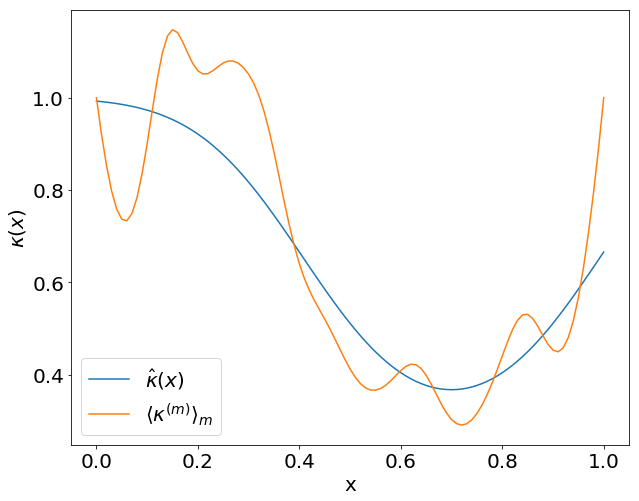

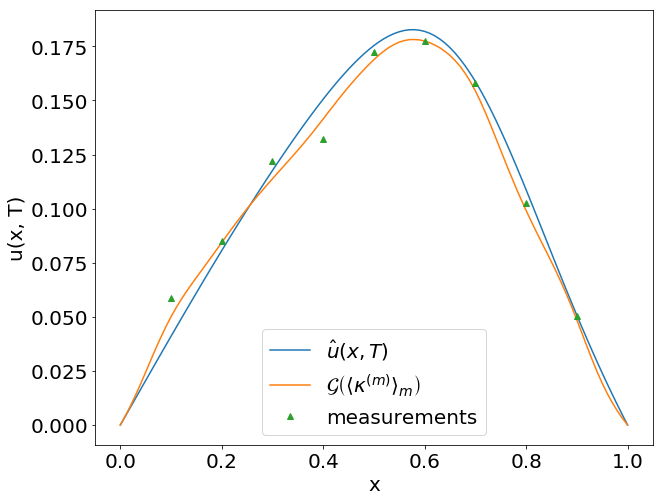

In [229]:
ξ_mean = np.mean(Ξ_record, axis=1)
ξ_std = np.std(Ξ_record, axis=1)

κ_res = np.exp(build_X(ξ_mean))
u_res = solve(κ_res)

plt.figure(figsize=(10, 8))
plt.plot(x_true, κ_true(x_true), label="$\\hat \\kappa(x)$")
plt.plot(x_true, κ_res, label="$\\left\\langle \\kappa^{(m)} \\right\\rangle_m$")
plt.xlabel('x')
plt.ylabel('$\\kappa(x)$')
plt.legend(loc="lower left")
plt.savefig("kappa-comparison.pdf")
plt.show()

plt.figure(figsize=(10, 8))
plt.plot(x_true, u_true, label="$\\hat u(x, T)$")
plt.plot(x_true, u_res, label="$\\mathcal{G}\\left(\\left\\langle \\kappa^{(m)}\\right\\rangle_m\\right)$")
plt.plot(x_meas, u_meas, "^", label="measurements")
plt.xlabel('x')
plt.ylabel('u(x, T)')
plt.legend()
plt.savefig("u-comparison.pdf")
plt.show()

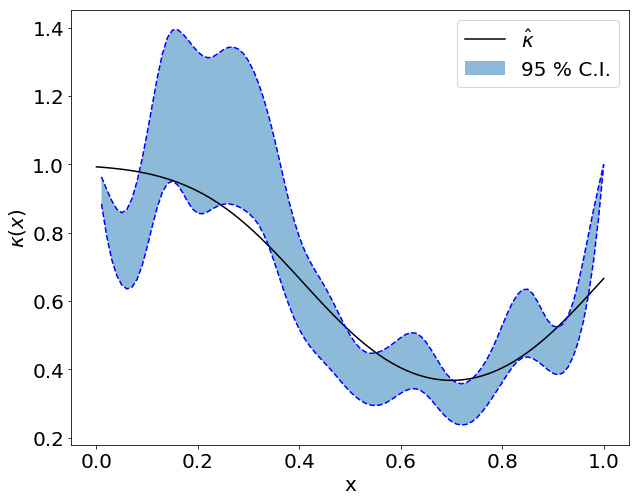

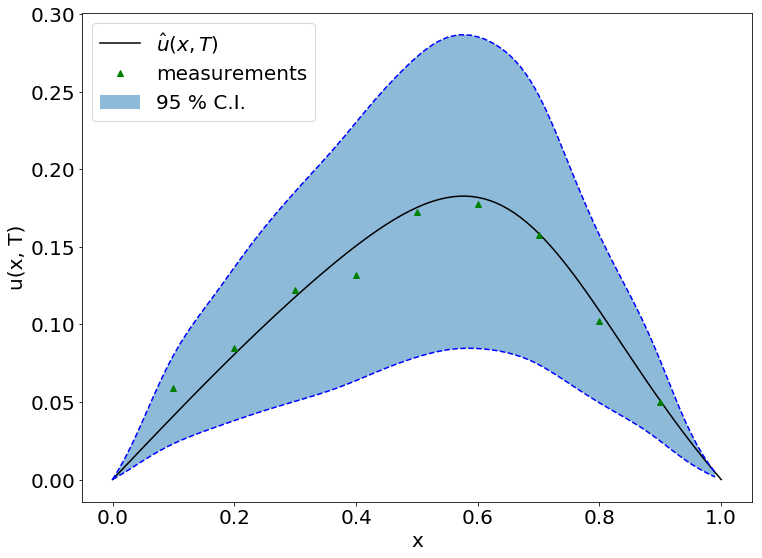

In [237]:
# Confidence bounds
nsamples = 100
ξ_samples = np.random.normal(loc=ξ_mean, scale=ξ_std, size=(nsamples, Nmax-1))
X_samples = np.zeros((nsamples, len(x_true)))


for i in range(nsamples):
   X_samples[i, :] = build_X(ξ_samples[i, :])

#κ_samples = np.exp(X_samples)
# κ confidence bounds pointwise
X_mean = np.mean(X_samples, axis=0)
X_std = np.std(X_samples, axis=0)

X_ci = stat.norm.interval(0.95, loc=X_mean, scale=X_std)

plt.figure(figsize=(10, 8))
plt.plot(x_true, κ_true(x_true), "k", label="$\\hat \\kappa$")
plt.plot(x_true, np.exp(X_ci[1]), "b--")
plt.plot(x_true, np.exp(X_ci[0]), "b--")
plt.fill_between(x_true, np.exp(X_ci[1]), np.exp(X_ci[0]), alpha=0.5, label="95 % C.I.")
plt.xlabel('x')
plt.ylabel('$\\kappa(x)$')
plt.legend()
plt.savefig("kappa-ci.pdf")
plt.show()


# u confidence bounds pointwise
u_samples = np.zeros((nsamples, len(x_true)))
for i in range(nsamples):
    u_samples[i, :] = solve(np.exp(X_samples[i, :]))

u_mean = np.mean(u_samples, axis=0)
u_std = np.std(u_samples, axis=0)

u_ci = stat.norm.interval(0.95, loc=u_mean, scale=u_std)

plt.figure(figsize=(12, 9))
plt.plot(x_true, u_true, "k", label="$\\hat u(x, T)$")
plt.plot(x_true, u_ci[1], "b--")
plt.plot(x_true, u_ci[0], "b--")
plt.fill_between(x_true, u_ci[1], u_ci[0], alpha=0.5, label="95 % C.I.")
plt.plot(x_meas, u_meas, "g^", label="measurements")
plt.xlabel('x')
plt.ylabel('u(x, T)')
plt.legend()
plt.savefig("u-ci.pdf")
plt.show()